# CSE276A HW2 Rishabh Bhattacharya

## Solution 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

original_points = np.loadtxt("waypoints.csv", delimiter=",")
downsampled_points = {  '10Hz': { 'waypoints':[]},
                        '1Hz':{ 'waypoints':[]},
                        '0.2Hz':{ 'waypoints':[]}
                    }
interp_data = { 'linear_interp':{
                    '10Hz': { 'waypoints':[], 'error': 0 },
                    '1Hz':  { 'waypoints':[], 'error': 0 },
                    '0.2Hz':{ 'waypoints':[], 'error': 0 }
                    },            
                'quad_interp':{
                    '10Hz': { 'waypoints':[], 'error': 0 },
                    '1Hz':  { 'waypoints':[], 'error': 0 },
                    '0.2Hz':{ 'waypoints':[], 'error': 0 }
                },            
                'cubic_interp':{
                    '10Hz': { 'waypoints':[], 'error': 0 },
                    '1Hz':  { 'waypoints':[], 'error': 0 },
                    '0.2Hz':{ 'waypoints':[], 'error': 0 }
                }
            }

def plot_ground_truth_traj(data, freq):
    """
    Plot ground truth trajectory plots with title information.
    """
    plt.scatter(data[:,0], data[:,1], s=0.3)
    plt.title('Ground truth (%0.1fHz) with %d waypoints' %(freq, data.shape[0]))
    plt.show()

def plot_interpolated_traj(data, freq, type, error):
    """
    Plot interpolated trajectory plots with title information.
    """
    plt.scatter(data[:,0], data[:,1], s=0.3)
    plt.title('%s interpolation (%0.1fHz -> 30Hz) with %d waypoints\nCumulative norm error: %0.2f' %(type, freq, data.shape[0], error))
    plt.show()

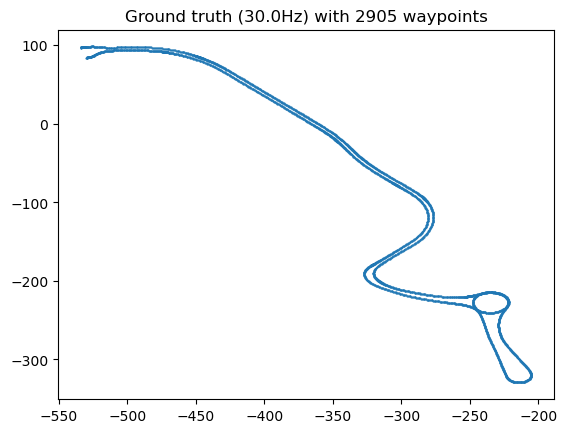

In [2]:
plot_ground_truth_traj(original_points, 30)

## Solution 1.2
### Downsampled waypoints

For the following sections, we will use a sum of squares formula to report interpolation error. Given $N$ waypoints in the original dataset,

$$e = \sum^{N-1}_{i=0} ||X_{original,i} - X_{interpolated,i}|| = \sum^{N-1}_{i=0} \sqrt{\left(x_{original,i} - x_{interpolated,i}\right)^2 + \left(y_{original,i} - y_{interpolated,i}\right)^2}$$

where $X_{original,i} = \left(x_{original,i},y_{original,i}\right)$ and $X_{interpolated,i} = \left(x_{interpolated,i},y_{interpolated,i}\right)$.

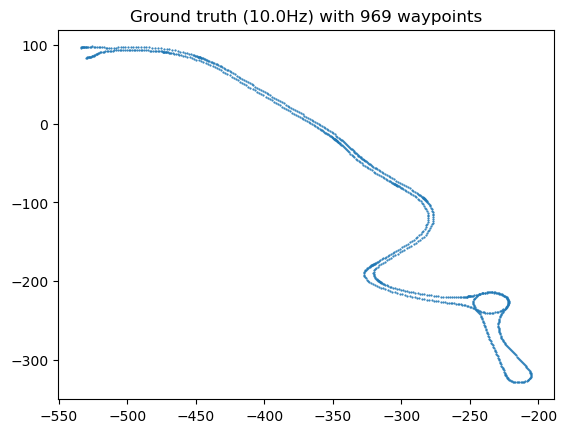

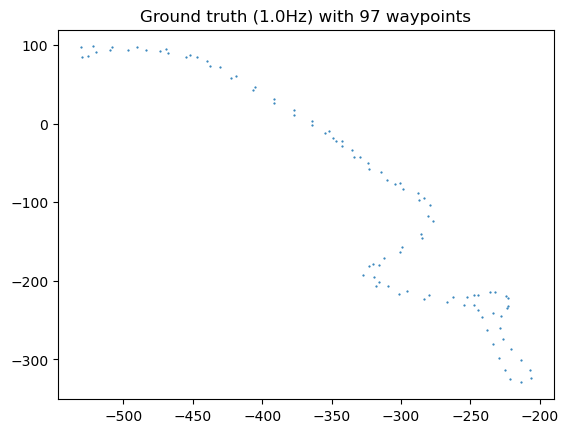

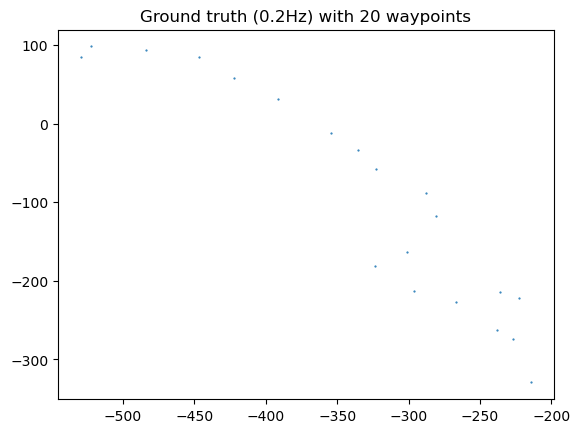

In [3]:
step = int(30/10)
downsampled_points['10Hz']['waypoints'] = original_points[::step,:]       # For 10Hz, we have 3x less points
step = int(30/1)
downsampled_points['1Hz']['waypoints'] = original_points[::step,:]       # For 1Hz, we have 30x less points
step = int(30/0.2)
downsampled_points['0.2Hz']['waypoints'] = original_points[::step,:]     # For 0.2Hz, we have 150x less points

plot_ground_truth_traj(downsampled_points['10Hz']['waypoints'], 10)
plot_ground_truth_traj(downsampled_points['1Hz']['waypoints'], 1)
plot_ground_truth_traj(downsampled_points['0.2Hz']['waypoints'], 0.2)

### Solution 1.2.a Linear interpolation
We need to parametrize the linear interpolation equation between two points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$ using,

$$\boxed{(x_t, y_t) = (1-t)(x_i,y_i) + t(x_{i+1},y_{i+1})}$$

such that we get $$(x_t,y_t) = (x_i,y_i), \; t=0 $$ and $$(x_t,y_t) = (x_{i+1},y_{i+1}), \; t=1 $$ for a time parameterization of $t \in [0,1]$ between waypoints $i$ and $i+1$.

For the 10Hz case, we need 2 interpolation points between each waypoints $i$ and $i+1$ at a step size of $dt = \dfrac{1}{30/10} = 0.33$. Thus we obtain values at $t=[dt, 2dt, \cdots, 1-dt]$ such that we get waypoints at,
$$(t_0, \underbrace{t_{0.33}, t_{0.66}}_{30/10-1 = 2\; \text{waypoints}}, t_1)$$

Similarly, for the 1Hz case, $dt = \dfrac{1}{30/1} = 0.033$. The waypoints are at,
$$(t_0, \underbrace{t_{0.033}, t_{0.066}, t_{0.1}, t_{0.133}, \cdots}_{30/1-1=29\; \text{waypoints}}, t_1)$$

Similarly, for the 0.2Hz case, $dt = \dfrac{1}{30/0.2} = 0.0067$. The waypoints are at,
$$(t_0, \underbrace{t_{0.0067}, t_{0.0133}, t_{0.02}, \cdots}_{30/0.2-1=149\; \text{waypoints}}, t_1)$$

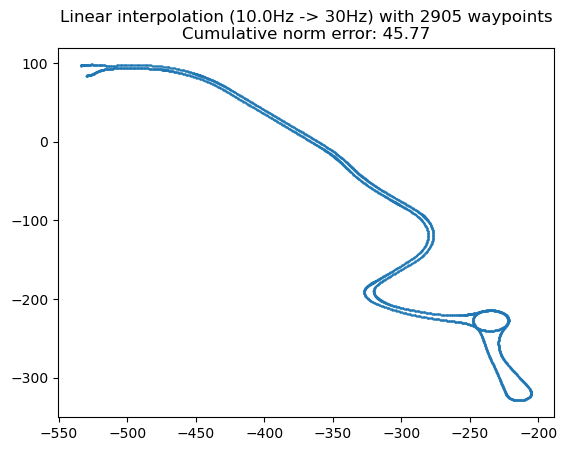

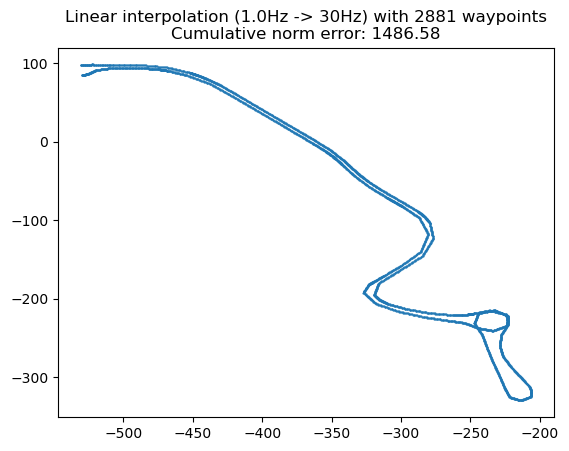

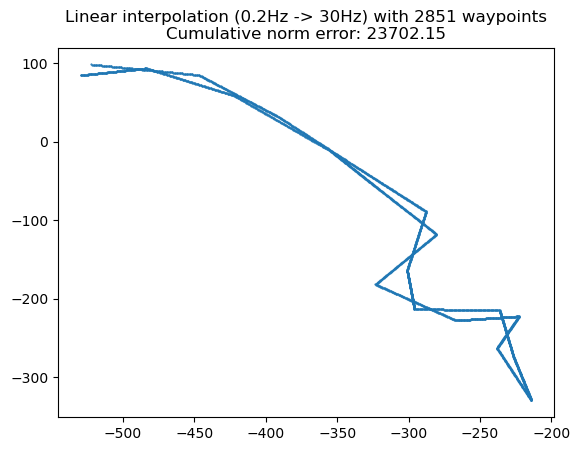

In [4]:
def createLinearInterpolation(freq, downsampled_points):
    """
    Return linearly interpolated waypoints.
    """
    n_interp = int(30/freq)            
    dt = 1/n_interp                                                 # step size of interpolations
    n = downsampled_points.shape[0]
    interpolated_points = []         # Waypoints after interpolation will be (n-1) * n_interp + 1

    for i in range(1,n):
        for t in np.arange(0,1,dt):
            interpolated_points.append((1-t)*downsampled_points[i-1] + (t)*downsampled_points[i])

    interpolated_points.append(downsampled_points[i])           # Append last point of the downsampled array
    return np.array(interpolated_points)

def calcError(data1, data2=original_points):
    """
    Return the cumulative norm error b/w two sets of waypoints.
    """
    m,n = data1.shape[0], data2.shape[0]

    if m!=n:
        truncate = np.minimum(m,n)
        data1 = data1[:truncate]
        data2 = data2[:truncate]
    
    return np.sum(np.linalg.norm(data1-data2, axis=1))

# Create all interpolations
interp_data['linear_interp']['10Hz']['waypoints']  = createLinearInterpolation(10,  downsampled_points['10Hz']['waypoints'])
interp_data['linear_interp']['1Hz']['waypoints']   = createLinearInterpolation(1,   downsampled_points['1Hz']['waypoints'])
interp_data['linear_interp']['0.2Hz']['waypoints'] = createLinearInterpolation(0.2, downsampled_points['0.2Hz']['waypoints'])

# Calculate all errors
interp_data['linear_interp']['10Hz']['error']  = calcError(interp_data['linear_interp']['10Hz']['waypoints'],  original_points)
interp_data['linear_interp']['1Hz']['error']   = calcError(interp_data['linear_interp']['1Hz']['waypoints'],   original_points)
interp_data['linear_interp']['0.2Hz']['error'] = calcError(interp_data['linear_interp']['0.2Hz']['waypoints'], original_points)

# Plot all interpolations
plot_interpolated_traj(interp_data['linear_interp']['10Hz']['waypoints'],  10,  'Linear', interp_data['linear_interp']['10Hz']['error'])
plot_interpolated_traj(interp_data['linear_interp']['1Hz']['waypoints'],   1,   'Linear', interp_data['linear_interp']['1Hz']['error'])
plot_interpolated_traj(interp_data['linear_interp']['0.2Hz']['waypoints'], 0.2, 'Linear', interp_data['linear_interp']['0.2Hz']['error'])


### Solution 1.2.b Quadratic interpolation

We need to parametrize the quadratic interpolation equation between three points $(x_i,y_i)$, $(x_{i+1},y_{i+1})$ and $(x_{i+2},y_{i+2})$. 

Without loss of generality, assume 3 points $(x_0,y_0), (x_1,y_1), (x_2,y_2)$ recorded at timestamps $t_0, t_1, t_2$. Each coordinate is parameterized w.r.t. time (_t_) i.e. $x_t = f(t), y_t = g(t)$. Using Langrange's polynomial interpolation for 2nd order, we have

$$\boxed{x_t = \dfrac{(t-t_1)(t-t_2)}{(t_0-t_1)(t_0-t_2)}x_0 + \dfrac{(t-t_0)(t-t_2)}{(t_1-t_0)(t_1-t_2)}x_1 + \dfrac{(t-t_0)(t-t_1)}{(t_2-t_0)(t_2-t_1)}x_2}$$
$$\boxed{y_t = \dfrac{(t-t_1)(t-t_2)}{(t_0-t_1)(t_0-t_2)}y_0 + \dfrac{(t-t_0)(t-t_2)}{(t_1-t_0)(t_1-t_2)}y_1 + \dfrac{(t-t_0)(t-t_1)}{(t_2-t_0)(t_2-t_1)}y_2}$$

where $(x_t,y_t)$ are the interpolated coordinates at time _t_.

For verification, we get $(x_t,y_t) = (x_0,y_0), \; t=0 $, $(x_t,y_t) = (x_1,y_1), \; t1$ and $(x_t,y_t) = (x_2,y_2), \; t=2 $ for a time parameterization of $t \in [0,2]$.

For the 10Hz case, we need 2 interpolation points between each waypoints $i$ and $i+1$ and 2 more between $i+1$ and $i+2$ at a step size of $dt = \dfrac{1}{30/10} = 0.33$. Thus we obtain waypoints at,
$$(t_0, \underbrace{t_{0.33}, t_{0.66}}_{30/10-1 = 2\; \text{waypoints}}, t_1, \underbrace{t_{1.33}, t_{1.66}}_{30/10-1 = 2\; \text{waypoints}}, t_2)$$

Similarly, for the 1Hz case, $dt = \dfrac{1}{30/1} = 0.033$. The waypoints are at,
$$(t_0, \underbrace{t_{0.033}, t_{0.066}, t_{0.1}, t_{0.133}, \cdots}_{30/1-1=29\; \text{waypoints}}, t_1, \underbrace{t_{1.033}, t_{1.066}, t_{1.1}, t_{1.133}, \cdots}_{30/1-1=29\; \text{waypoints}}, t_2)$$

Similarly, for the 0.2Hz case, $dt = \dfrac{1}{30/0.2} = 0.0067$. The waypoints are at,
$$(t_0, \underbrace{t_{0.0067}, t_{0.0133}, t_{0.02}, \cdots}_{30/0.2-1=149\; \text{waypoints}}, t_1, \underbrace{t_{1.0067}, t_{1.0133}, t_{1.02}, \cdots}_{30/0.2-1=149\; \text{waypoints}}, t_2)$$


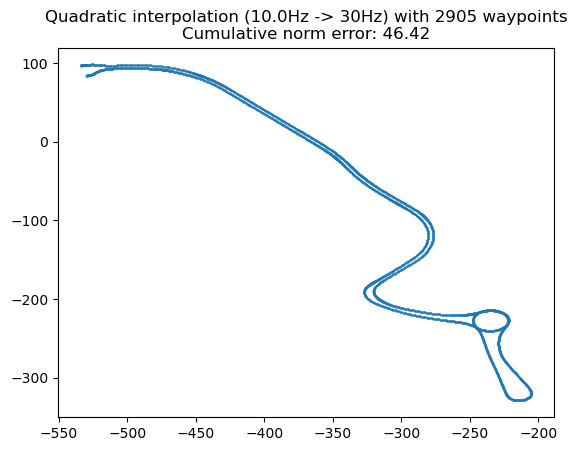

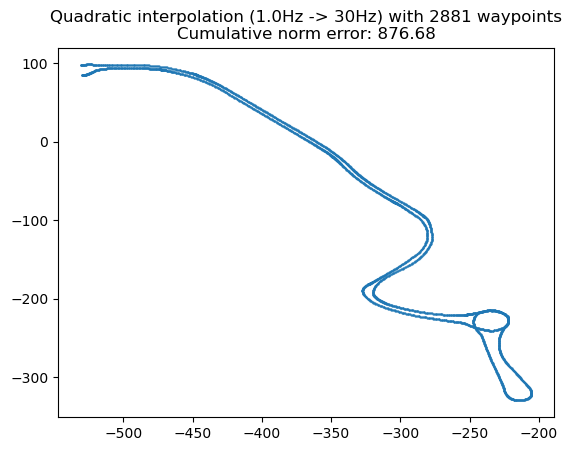

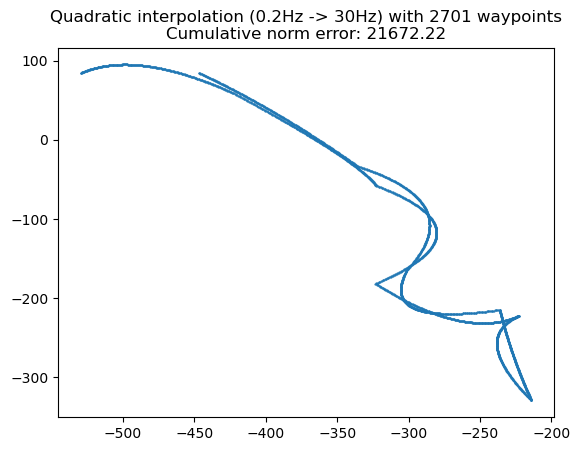

In [5]:
def createQuadraticInterpolation(freq, downsampled_points):
    """
    Return quadratically interpolated waypoints.
    """
    n_interp = int(30/freq)            
    dt = 1/n_interp                                                 # step size of interpolations
    n = downsampled_points.shape[0]
    interpolated_points = []        

    for i in range(0,n-2,2):
        for t in np.arange(0,2,dt):
            [x0,y0] = downsampled_points[i]
            [x1,y1] = downsampled_points[i+1]
            [x2,y2] = downsampled_points[i+2]
            t0, t1, t2 = 0, 1, 2
            
            interpolated_x = (t-t1)*(t-t2)*x0/((t0-t1)*(t0-t2)) + (t-t0)*(t-t2)*x1/((t1-t0)*(t1-t2)) + (t-t0)*(t-t1)*x2/((t2-t0)*(t2-t1))
            interpolated_y = (t-t1)*(t-t2)*y0/((t0-t1)*(t0-t2)) + (t-t0)*(t-t2)*y1/((t1-t0)*(t1-t2)) + (t-t0)*(t-t1)*y2/((t2-t0)*(t2-t1))
            interpolated_points.append([interpolated_x, interpolated_y])


    try:
        interpolated_points.append(downsampled_points[i+2])           # Append last point of the downsampled array
        return np.array(interpolated_points)
    except:
        print('Interpolation failed!! Dataset too small for quadratic interpolation. Need >=3 points. Total points present = %d!'%(n)) 
        return 0
    
    
# Create all interpolations
interp_data['quad_interp']['10Hz']['waypoints']  = createQuadraticInterpolation(10,  downsampled_points['10Hz']['waypoints'])
interp_data['quad_interp']['1Hz']['waypoints']   = createQuadraticInterpolation(1,   downsampled_points['1Hz']['waypoints'])
interp_data['quad_interp']['0.2Hz']['waypoints'] = createQuadraticInterpolation(0.2, downsampled_points['0.2Hz']['waypoints'])

# Calculate all errors
interp_data['quad_interp']['10Hz']['error']  = calcError(interp_data['quad_interp']['10Hz']['waypoints'],  original_points)
interp_data['quad_interp']['1Hz']['error']   = calcError(interp_data['quad_interp']['1Hz']['waypoints'],   original_points)
interp_data['quad_interp']['0.2Hz']['error'] = calcError(interp_data['quad_interp']['0.2Hz']['waypoints'], original_points)

# Plot all interpolations
plot_interpolated_traj(interp_data['quad_interp']['10Hz']['waypoints'],  10,  'Quadratic', interp_data['quad_interp']['10Hz']['error'])
plot_interpolated_traj(interp_data['quad_interp']['1Hz']['waypoints'],   1,   'Quadratic', interp_data['quad_interp']['1Hz']['error'])
plot_interpolated_traj(interp_data['quad_interp']['0.2Hz']['waypoints'], 0.2, 'Quadratic', interp_data['quad_interp']['0.2Hz']['error'])

### Solution 1.2.c Cubic spline interpolation

The tri-diagonal matrix [approach](https://en.wikiversity.org/wiki/Cubic_Spline_Interpolation) has been used to solve this part. For a cubic spline interpolation for one coordinate (say $x$), we require $n$ piecewise cubic polynomials $$f_i(t) = \{a_ix^3 + b_ix^2 +c_ix +d_i\},\; i \in \{1,2 \cdots n \}$$ for $n+1$ waypoints. Thus we need $4n$ equations to solve for all the coefficients (for $x$ only). We use, 

1. **Continuity at the waypoints (n + n equations)**: $f_i\left(t_{i-1}\right)=x_{i-1}$ and $f_i\left(t_i\right)=x_i, i=1, \ldots, n$
2. **Continuity of 1st derivative (n-1 equations)**: $f_i^{\prime}\left(t_i\right)=f_{i+1}^{\prime}\left(t_i\right), i=1, \ldots, n-1$
3. **Continuity of 2nd derivative (n-1 equations)**: $f_i^{\prime \prime}\left(t_i\right)=f_{i+1}^{\prime \prime}\left(t_i\right), i=1, \ldots, n-1$

Thus we obtain $4n-2$ equations. The rest 2 equations are enforced based on some assumptions. For this implementation, we use the natural spline condition, which says that $$f_1^{\prime \prime}(t_0) = f_n^{\prime \prime}(t_n) = 0$$

Now we obtain $4n$ equations for $4n$ variables, and we can now solve for all the coefficients and obtain the piecewise cubic spline functions.
<p align="center">
  <img src="tridiagonal.png" alt="drawing" width="400"/>
</p>

where $ h_i = t_i - t_{i-1}, \quad \mu_i=\dfrac{h_i}{h_i+h_{i+1}}, \quad \lambda_i=1-\mu_i=\dfrac{h_{i+1}}{h_i+h_{i+1}}, \quad d_i=6 f\left[t_{i-1}, t_i, t_{i+1}\right],$

$f_i^{\prime \prime}\left(t_i\right)=f_{i+1}^{\prime \prime}\left(t_i\right)=M_i (i=1, \cdots, n-1)$ and $f_1^{\prime \prime}\left(t_0\right)=M_0=0$, and $f_n^{\prime \prime}\left(t_n\right)=M_n=0$

The polynomial (**for x-coordinate**) between any two waypoints is then given by,
$$\boxed{f_i(t)=x_i=M_{i-1} \frac{\left(t_i-t\right)^3}{6 h_i}+M_i \frac{\left(t-t_{i-1}\right)^3}{6 h_i}+\left(x_{i-1}-\frac{M_{i-1} h_i^2}{6}\right) \frac{t_i-t}{h_i}+\left(x_i-\frac{M_i h_i^2}{6}\right) \frac{t-t_{i-1}}{h_i}} \quad \text{for} \quad t \in\left[t_{i-1}, t_i\right]$$

Similarly, the polynomial for **y-coordinate** is given by,
$$\boxed{g_i(t)=y_i=M_{i-1} \frac{\left(t_i-t\right)^3}{6 h_i}+M_i \frac{\left(t-t_{i-1}\right)^3}{6 h_i}+\left(y_{i-1}-\frac{M_{i-1} h_i^2}{6}\right) \frac{t_i-t}{h_i}+\left(y_i-\frac{M_i h_i^2}{6}\right) \frac{t-t_{i-1}}{h_i}} \quad \text{for} \quad t \in\left[t_{i-1}, t_i\right]$$

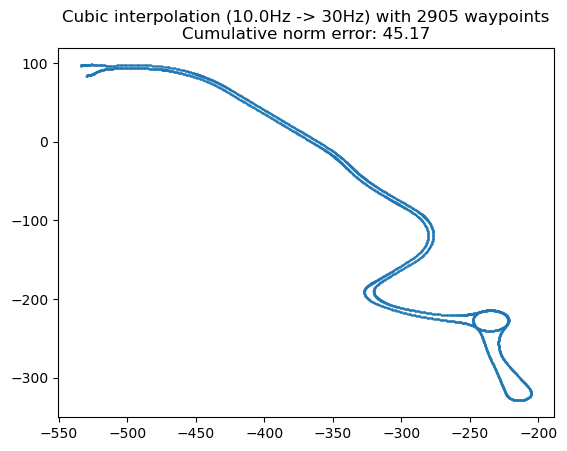

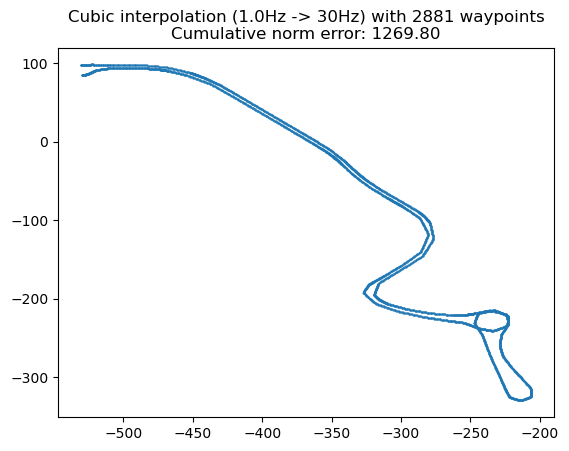

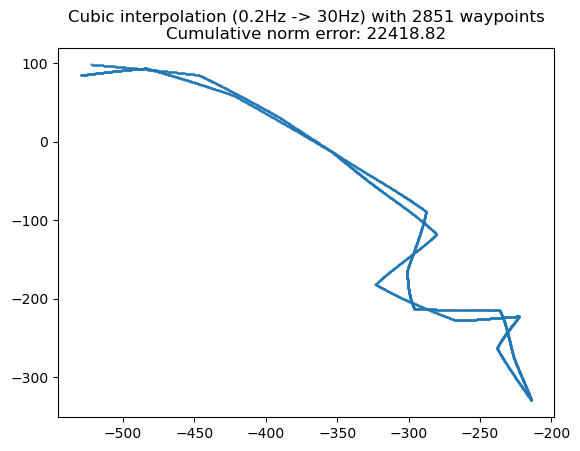

In [6]:
def cubicSpline(freq, data):
    """
    Return cubic spline interpolated coordinate (single coordinate i.e. either x or y).
    """
    # Initialize all required values/matrices
    n = data.shape[0] - 1
    n_interp = int(30/freq - 1)
    t = np.arange(0,(n+1)/freq,1/freq)
    dt = 1/30
    h = 1/freq
    D = 2*np.eye(n+1)
    d = np.zeros(n+1)
    lamb, mu = 0.5, 0.5 
    d[0], d[n] = 0, 0

    for i in range(n):              # Create LHS coefficient matrix
        D[i,i+1] = lamb
        D[i+1,i] = mu
        if i>=1 and i<=n-1:         # Divided difference
            d[i] = data[i-1] / ((t[i-1]-t[i])*(t[i-1]-t[i+1])) + \
                    data[i] / ((t[i]-t[i-1])*(t[i]-t[i+1])) + \
                        data[i+1] / ((t[i+1]-t[i-1])*(t[i+1]-t[i]))

    D[0,1] = 0                      # lambda_0 = 0
    D[-1,-2] = 0                    # mu_n = 0

    M = np.linalg.inv(D) @ d    # Find values of M (second derivatives)

    interpolated_data = []
    count = 0
    for i in range(1,n+1):      # Interpolation loop
        for time in np.linspace(t[i-1],t[i],n_interp+2)[:-1]:
            C = M[i-1] * (t[i] - time)**3 / (6*h) + \
                    M[i] * (time - t[i-1])**3 / (6*h) + \
                        (data[i-1] - M[i-1]*h**2 / 6) * ((t[i] - time) / h) + \
                            (data[i] - M[i]*h**2 / 6) * ((time - t[i-1]) / h)
            
            interpolated_data.append(C)

    interpolated_data.append(data[-1])

    return np.array(interpolated_data)

def createCubicInterpolation(freq, downsampled_points):
    """
    Return cubic spline interpolated waypoints (x,y). Calls cubicSpline twice over x and y coordinates.
    """
    x = cubicSpline(freq, downsampled_points[:,0])
    y = cubicSpline(freq, downsampled_points[:,1])

    return np.vstack((x,y)).T
    
    
    
# Create all interpolations
interp_data['cubic_interp']['10Hz']['waypoints']  = createCubicInterpolation(10,  downsampled_points['10Hz']['waypoints'])
interp_data['cubic_interp']['1Hz']['waypoints']   = createCubicInterpolation(1,   downsampled_points['1Hz']['waypoints'])
interp_data['cubic_interp']['0.2Hz']['waypoints'] = createCubicInterpolation(0.2, downsampled_points['0.2Hz']['waypoints'])

# Calculate all errors
interp_data['cubic_interp']['10Hz']['error']  = calcError(interp_data['cubic_interp']['10Hz']['waypoints'],  original_points)
interp_data['cubic_interp']['1Hz']['error']   = calcError(interp_data['cubic_interp']['1Hz']['waypoints'],   original_points)
interp_data['cubic_interp']['0.2Hz']['error'] = calcError(interp_data['cubic_interp']['0.2Hz']['waypoints'], original_points)

# Plot all interpolations
plot_interpolated_traj(interp_data['cubic_interp']['10Hz']['waypoints'],  10,  'Cubic', interp_data['cubic_interp']['10Hz']['error'])
plot_interpolated_traj(interp_data['cubic_interp']['1Hz']['waypoints'],   1,   'Cubic', interp_data['cubic_interp']['1Hz']['error'])
plot_interpolated_traj(interp_data['cubic_interp']['0.2Hz']['waypoints'], 0.2, 'Cubic', interp_data['cubic_interp']['0.2Hz']['error'])

### Solution 1.3

We observe that the quality of interpolated paths is **much better on higher sample rates (10Hz, 1Hz)** compared to lower sample rates (0.2 Hz). In the 0.2Hz data, we only have 20 waypoints to interpolate the entire trajectory, which is why we observe worse results in all of the interpolations (linear, quadratic and cubic). Surprisingly, the 1Hz data interpolates relatively well using all the three interpolation methods, which is why a case can be made to use 1Hz instead of 10Hz if the absolute need arises (cheaper sensors, low memory, etc).

Interpolation on a low sample rate (as is obtained in this example) is detrimental since the path clearly violates all dynamics of the vehicle. It causes sudden and sharp turns, and the interpolated path crosses over the road into some buildings, sidewalks, etc. The roundabout is completely missing as well. If the trajectory has many turns/deviations/curves, then a low sample rate can be detrimental and would hide much of the useful trajectory.

### Solution 1.4

<center>

| Error     	| 10Hz 	|  1Hz 	| 0.2Hz 	|
|-----------	|:----:	|:----:	|:-----:	|
| Linear    	|  46  	| 1487 	| 23702 	|
| Quadratic 	|  46  	|  877 	| 21672 	|
| Cubic     	|  45  	| 1270 	| 22419 	|

</center>

1. We observe that for the **10Hz data, linear interpolation is good enough** (since we have a large no. of samples). Additional complex interpolations do not yield highly better results (even though cubic spline has the least error, it is not very far from linear interpolation).
2. For the **1Hz data, quadratic interpolation yields highly improved results** compared to the other interpolations. Surprisingly, the error increases while performing cubic spline.
3. For the 0.2Hz data, none of the interpolations yield acceptable results, due to the low number of samples.

Overall, the takeaway is that **more the number of samples, better will be the interpolation**. However, we can experiment with different interpolation techniques to figure out which is the best for a particular application (**quadratic seems to be the most favorable in this case** based on the interpolation error vs interpolation runtime/complexity).

## Solution 2

Suppose that $f:[a, b] \rightarrow \mathbb{R}$ is an element of $C^{N+1}[a, b]$, such that $x_0<x_1<\ldots<x_N$ are points in $[a, b]$, and that $p$ is the unique polynomial of degree $N$ which interpolates $f$ at the nodes $x_0, \ldots, x_N$. Then, for each $x \in[a, b]$, there is a point $\xi_x \in(a, b)$ such that
$$f(x)=p(x)+\frac{f^{(N+1)}\left(\xi_x\right)}{(N+1) !}\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_N\right)$$

Thus the error between the ground truth and the interpolation can be found to be, 
$$\boxed{e(x)=f(x)-p(x) = \frac{f^{(N+1)}\left(\xi_x\right)}{(N+1) !}\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_N\right)}$$

We want to build a cheap robot, that interpolates $f(x) = cosx, \quad x \in [0,\pi]$ with a 6 decimal digit accuracy. Thus the interpolation must be within $5\times 10^{-7}$ units of accuracy from the ground truth.

### Solution 2.a Linear interpolation

For linear interpolation, $e(x) \leq 5\times 10^{-7}$ and $N=1$. Thus we have,
$$e(x) = \frac{f^{(2)}\left(\xi_x\right)}{2!}\left(x-x_0\right)\left(x-x_1\right) \implies e(x) = \frac{-cos(\xi_x)}{2}\left(x-x_0\right)\left(x-x_1\right)$$

Since we want to bound the maximum value of $e(x)$, we can bound $\mid\mid e(x) \mid\mid$ using
$$e(x) \leq \max\{e(x)\} \leq \max \{\mid\mid e(x) \mid\mid\}$$ 

Now,
$$\max\{e(x)\} \leq \frac{1}{2} \max(||cos(\xi_x)||) \max\{||\left(x-x_0\right)\left(x-x_1\right)||\}$$

Using an upper bound as follows,
$$\frac{1}{2} \quad .\quad \underbrace{\max(||cos(\xi_x)||)}_{\max = 1} \quad .\quad \max\{||\left(x-x_0\right)\left(x-x_1\right)||\} \leq 5\times 10^{-7}$$

where $\max\{||\left(x-x_0\right)\left(x-x_1\right)||\} = \dfrac{(x_0-x_1)^2}{4}$ at $x = \dfrac{x_0+x_1}{2}, \quad x \in [x_0,x_1]$ (by differentiating and set $\frac{d\left(x-x_0\right)\left(x-x_1\right)}{dx}=0$). If this upper bound is satisfied, all successive lower bounds will also be satisfied.

Since we want to determine the spacing between two entries, let $d=|x_1-x_0|$. Substituting the values,

$$\frac{1}{2} \quad .\quad 1 \quad .\quad \dfrac{d^2}{4} \leq 5\times 10^{-7} \implies d^2 \leq 4 \times 10^{-6} \implies \boxed{d \leq 0.002}$$

Thus we obtain the spacing $d \leq 0.002$ for the interpolation to have 6-decimal digit accuracy.


### Solution 2.b Quadratic interpolation

For quadratic interpolation, $e(x) \leq 5\times 10^{-7}$ and $N=2$. Thus we have,
$$e(x) = \frac{f^{(3)}\left(\xi_x\right)}{3!}\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right) \implies e(x) = \frac{sin(\xi_x)}{6}\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)$$

Similar to the approach used above, we want to bound

$$\frac{1}{6} \quad .\quad \underbrace{\max(||sin(\xi_x)||)}_{\max = 1} \quad .\quad \max\{||\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)||\}$$

<p align="center">
  <img src="numberline.png" alt="drawing" width="900"/>
</p>

Since $x \in [x_0,x_2]$, let's assume $x = x_1 + h, \quad h \in [-d,d]$ where $d = |x_{i+1}-x_{i}|$ is the spacing between two tabled values.

$$\therefore \max\{||\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)|| = \max\{||\left(x_1+h-x_0\right)\left(h\right)\left(x_1+h-x_2\right)|| = \max\{||(d+h)(h)(-d+h)||\} = \max\{||h(h^2-d^2)||\}$$

Maximizing $g(h) = h(h^2-d^2), \quad h \in [-d,d]$, by setting the first derivative to zero, we get $h = \pm \frac{d}{\sqrt{3}}$. At either $h$, we get $g(h) = \mp \frac{2d^3}{3\sqrt{3}}$. Since we are trying to maximize $||g(h)||$, we have $$\max\{||\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)||= \max\{||h(h^2-d^2)||\} = \max\{||g(h)||\} = \dfrac{2d^3}{3\sqrt{3}}$$

Thus we have,

$$\frac{1}{6} \quad .\quad \underbrace{\max(||sin(\xi_x)||)}_{\max = 1} \quad .\quad \underbrace{\max\{||\left(x-x_0\right)\left(x-x_1\right)\left(x-x_2\right)||\}}_{\max = \dfrac{2d^3}{3\sqrt{3}}} \leq 5\times 10^{-7}$$

$$\frac{1}{6} \quad .\quad 1 \quad .\quad \dfrac{2d^3}{3\sqrt{3}} \leq 5\times 10^{-7} \implies d^3 \leq 45 \sqrt{3} \times 10^{-7} \implies \boxed{d \leq 0.0198}$$

Thus we obtain the spacing $d \leq 0.0198$ for the interpolation to have 6-decimal digit accuracy.

### Solution 2.c Number of entries

1. For **linear interpolation**, $N \geq \dfrac{\pi}{d} = \dfrac{\pi}{0.002} = 1570.8 \implies \boxed{N = 1571}$ entries.
2. For **quadratic interpolation**, $N \geq \dfrac{\pi}{d} = \dfrac{\pi}{0.0198} = 158.67 \implies \boxed{N = 159}$ entries.